### 라이브러리 로드 및 파일 로드드

In [240]:
import pandas as pd
import numpy as np

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report

from sklearn.multioutput import ClassifierChain
from sklearn.multioutput import MultiOutputClassifier

from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from lightgbm import LGBMClassifier
import xgboost as xgb
from xgboost import plot_importance
from sklearn.neural_network import MLPClassifier
from sklearn import tree

from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

In [222]:
!pip install bayesian-optimization

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for bayesian-optimization: filename=bayesian_optimization-1.2.0-py3-none-any.whl size=11685 sha256=2d94f07b2de30909a3afdc525b2885c00964f88288f198d5412ce8570ac76e7e
  Stored in directory: /root/.cache/pip/wheels/fd/9b/71/f127d694e02eb40bcf18c7ae9613b88a6be4470f57a8528c5b
Successfully built bayesian-optimization


In [223]:
from bayes_opt import BayesianOptimization

In [173]:
cd /content/drive/MyDrive/기타/AI사이버보안2022

/content/drive/MyDrive/기타/AI사이버보안2022


In [174]:
malware_df = pd.read_csv("./malware_feature.csv")
malware_df.head(5)

,filename,MD5,e_cblp,e_cp,e_cparhdr,e_maxalloc,e_sp,e_lfanew,NumberOfSections,CreationYear,...,SizeOfHeapCommit,LoaderFlags,sus_sections,non_sus_sections,packer,packer_type,E_text,E_data,fileinfo,class
0,4725522152.txt,27dd578577f2d208d9a007b21c9e9ed8,20649,35588,22234,61307,2452,640,8,0,...,4096,1,2,6,0,NoPacker,0.000000,0.00000,0,4725522152
1,4725011706.txt,cefdfbb04165a2988edcb0276ebe2470,20649,35588,22234,61307,2452,640,8,0,...,4096,1,2,6,0,NoPacker,0.000000,0.00000,0,4725011706
2,4808904332.txt,9598e1c79370f8d1100ec826a3f862db,144,3,4,65535,184,128,7,0,...,4096,1,1,6,1,DevCv5,5.815713,0.07056,0,4808904332
3,4587123448.txt,a2ef32cf294b45d61cf5d5511e4a027e,144,3,4,65535,184,128,7,0,...,4096,1,1,6,1,DevCv5,6.235496,0.06728,0,4587123448
4,4684923595.txt,4a5345199ee0de9f0f6f97b86ac74b66,144,3,4,65535,184,128,7,0,...,4096,1,1,6,1,DevCv5,6.235496,0.06728,0,4684923595


In [175]:
malware_df.columns

Index(['filename', 'MD5', 'e_cblp', 'e_cp', 'e_cparhdr', 'e_maxalloc', 'e_sp',
       'e_lfanew', 'NumberOfSections', 'CreationYear', 'FH_char0', 'FH_char1',
       'FH_char2', 'FH_char3', 'FH_char4', 'FH_char5', 'FH_char6', 'FH_char7',
       'FH_char8', 'FH_char9', 'FH_char10', 'FH_char11', 'FH_char12',
       'FH_char13', 'FH_char14', 'MajorLinkerVersion', 'MinorLinkerVersion',
       'SizeOfCode', 'SizeOfInitializedData', 'SizeOfUninitializedData',
       'AddressOfEntryPoint', 'BaseOfCode', 'ImageBase', 'SectionAlignment',
       'FileAlignment', 'MajorOperatingSystemVersion', 'MajorImageVersion',
       'MajorSubsystemVersion', 'SizeOfImage', 'SizeOfHeaders', 'CheckSum',
       'Subsystem', 'OH_DLLchar0', 'OH_DLLchar1', 'OH_DLLchar2', 'OH_DLLchar3',
       'OH_DLLchar4', 'OH_DLLchar5', 'OH_DLLchar6', 'OH_DLLchar7',
       'OH_DLLchar8', 'OH_DLLchar9', 'OH_DLLchar10', 'SizeOfStackReserve',
       'SizeOfStackCommit', 'SizeOfHeapReserve', 'SizeOfHeapCommit',
       'LoaderFlags', '

### 파일 정보 분석

In [176]:
malware_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 66 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   filename                     30000 non-null  object 
 1   MD5                          30000 non-null  object 
 2   e_cblp                       30000 non-null  int64  
 3   e_cp                         30000 non-null  int64  
 4   e_cparhdr                    30000 non-null  int64  
 5   e_maxalloc                   30000 non-null  int64  
 6   e_sp                         30000 non-null  int64  
 7   e_lfanew                     30000 non-null  int64  
 8   NumberOfSections             30000 non-null  int64  
 9   CreationYear                 30000 non-null  int64  
 10  FH_char0                     30000 non-null  int64  
 11  FH_char1                     30000 non-null  int64  
 12  FH_char2                     30000 non-null  int64  
 13  FH_char3        

In [177]:
malware_df["packer_type"]

0             NoPacker
1             NoPacker
2               DevCv5
3               DevCv5
4               DevCv5
             ...      
29995           DevCv5
29996         NoPacker
29997    Armadillov171
29998    Armadillov171
29999         NoPacker
Name: packer_type, Length: 30000, dtype: object

In [178]:
malware_df.iloc[:,:15].describe()

,e_cblp,e_cp,e_cparhdr,e_maxalloc,e_sp,e_lfanew,NumberOfSections,CreationYear,FH_char0,FH_char1,FH_char2,FH_char3,FH_char4
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.0,30000.000000,30000.0,30000.000000,30000.000000,30000.0
mean,3559.006800,5935.774633,3709.734733,63265.588167,558.903367,291.664000,6.296467,0.0,0.561367,1.0,0.805600,0.638933,0.0
std,7645.516492,13265.917335,8285.689220,9932.089037,856.457746,970.953292,5.465440,0.0,0.496228,0.0,0.395745,0.480318,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,1.000000,0.0,0.000000,1.0,0.000000,0.000000,0.0
25%,144.000000,3.000000,4.000000,65535.000000,184.000000,128.000000,4.000000,0.0,0.000000,1.0,1.000000,0.000000,0.0
50%,144.000000,3.000000,4.000000,65535.000000,184.000000,240.000000,6.000000,0.0,1.000000,1.0,1.000000,1.000000,0.0
75%,144.000000,3.000000,4.000000,65535.000000,184.000000,256.000000,7.000000,0.0,1.000000,1.0,1.000000,1.000000,0.0
max,33972.000000,61924.000000,24910.000000,65535.000000,22053.000000,69816.000000,62.000000,0.0,1.000000,1.0,1.000000,1.000000,0.0


In [179]:
malware_df.iloc[:,15:30].describe()

,FH_char5,FH_char6,FH_char7,FH_char8,FH_char9,FH_char10,FH_char11,FH_char12,FH_char13,FH_char14,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.0,30000.000000,30000.0,30000.000000,30000.000000,30000.000000,3.000000e+04,3.000000e+04,3.000000e+04
mean,0.122300,0.050100,0.885100,0.500500,0.002100,0.002733,0.0,0.076833,0.0,0.050100,4.883967,28.651633,1.422606e+05,1.039779e+06,6.067975e+04
std,0.327637,0.218155,0.318907,0.500008,0.045778,0.052211,0.0,0.266331,0.0,0.218155,3.824359,26.007999,2.177670e+05,5.857504e+06,2.535846e+05
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,2.000000,0.000000,8.192000e+03,1.228800e+04,0.000000e+00
50%,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,2.000000,25.000000,1.187840e+05,2.252800e+04,5.120000e+02
75%,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,7.000000,56.000000,2.088960e+05,2.856960e+05,1.894400e+04
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,0.0,1.000000,48.000000,56.000000,1.054208e+07,4.819200e+07,1.606656e+06


In [180]:
malware_df.iloc[:,30:45].describe()

,AddressOfEntryPoint,BaseOfCode,ImageBase,SectionAlignment,FileAlignment,MajorOperatingSystemVersion,MajorImageVersion,MajorSubsystemVersion,SizeOfImage,SizeOfHeaders,CheckSum,Subsystem,OH_DLLchar0,OH_DLLchar1,OH_DLLchar2
count,3.000000e+04,3.000000e+04,30000.000000,30000.0,30000.0,30000.000000,30000.000000,30000.000000,30000.0,30000.0000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.00000
mean,1.333380e+05,6.096213e+04,0.881633,1.0,1.0,4.336800,98.140233,4.176200,1.0,0.9999,8.036586e+07,2.279800,0.116400,0.013500,0.15080
std,2.239608e+05,2.529676e+05,0.323047,0.0,0.0,0.912612,1426.919372,0.815297,0.0,0.0100,4.841987e+08,0.632291,0.320709,0.115404,0.35786
min,0.000000e+00,0.000000e+00,0.000000,1.0,1.0,0.000000,0.000000,0.000000,1.0,0.0000,0.000000e+00,0.000000,0.000000,0.000000,0.00000
25%,4.400000e+03,4.096000e+03,1.000000,1.0,1.0,4.000000,0.000000,4.000000,1.0,1.0000,0.000000e+00,2.000000,0.000000,0.000000,0.00000
50%,9.666000e+03,4.096000e+03,1.000000,1.0,1.0,4.000000,0.000000,4.000000,1.0,1.0000,1.744070e+05,2.000000,0.000000,0.000000,0.00000
75%,1.981940e+05,4.096000e+03,1.000000,1.0,1.0,4.000000,1.000000,4.000000,1.0,1.0000,3.664890e+05,3.000000,0.000000,0.000000,0.00000
max,9.086018e+06,1.396736e+06,1.000000,1.0,1.0,10.000000,21315.000000,10.000000,1.0,1.0000,3.005614e+09,16.000000,1.000000,1.000000,1.00000


In [181]:
malware_df.iloc[:,45:60].describe()

,OH_DLLchar3,OH_DLLchar4,OH_DLLchar5,OH_DLLchar6,OH_DLLchar7,OH_DLLchar8,OH_DLLchar9,OH_DLLchar10,SizeOfStackReserve,SizeOfStackCommit,SizeOfHeapReserve,SizeOfHeapCommit,LoaderFlags,sus_sections,non_sus_sections
count,30000.0,30000.000000,30000.0,30000.0,30000.000000,30000.000000,30000.0,30000.000000,3.000000e+04,3.000000e+04,3.000000e+04,30000.000000,30000.0,30000.000000,30000.000000
mean,0.0,0.008600,0.0,0.0,0.149367,0.084867,0.0,0.016033,1.479032e+06,7.666347e+03,1.037741e+06,4053.128533,1.0,2.012667,4.283200
std,0.0,0.092338,0.0,0.0,0.356455,0.278688,0.0,0.125606,5.629564e+05,4.827444e+04,1.149548e+05,420.862106,0.0,5.243315,1.811033
min,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,1.0,0.000000,0.000000
25%,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,1.048576e+06,4.096000e+03,1.048576e+06,4096.000000,1.0,0.000000,4.000000
50%,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,1.048576e+06,4.096000e+03,1.048576e+06,4096.000000,1.0,1.000000,4.000000
75%,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,2.097152e+06,4.096000e+03,1.048576e+06,4096.000000,1.0,2.000000,6.000000
max,0.0,1.000000,0.0,0.0,1.000000,1.000000,0.0,1.000000,4.194304e+06,1.048576e+06,4.194304e+06,8192.000000,1.0,58.000000,7.000000


In [182]:
malware_df.iloc[:,60:-1].describe()

,packer,E_text,E_data,fileinfo
count,30000.000000,30000.000000,30000.000000,30000.0
mean,0.657433,4.136053,1.406554,0.0
std,0.474576,2.902563,2.095674,0.0
min,0.000000,0.000000,0.000000,0.0
25%,0.000000,0.000000,0.000000,0.0
50%,1.000000,5.195156,0.070560,0.0
75%,1.000000,6.235496,3.139585,0.0
max,1.000000,7.999398,7.999056,0.0


In [183]:
malware_df = malware_df.drop(columns = ["fileinfo","LoaderFlags",'OH_DLLchar0','OH_DLLchar1','OH_DLLchar2','OH_DLLchar3',
                              'OH_DLLchar4','OH_DLLchar5','OH_DLLchar6','OH_DLLchar7','OH_DLLchar8','OH_DLLchar9','OH_DLLchar10',
                              'SizeOfImage','SizeOfHeaders','SectionAlignment','FileAlignment',
                              'FH_char5','FH_char6','FH_char7','FH_char8','FH_char9','FH_char10','FH_char11','FH_char12','FH_char13','FH_char14',
                              'CreationYear','FH_char0','FH_char1','FH_char2','FH_char3','FH_char4'])

In [184]:
malware_df.rename(columns = {'filename' : 'origin_file'}, inplace = True)

In [185]:
malware_df.rename(columns = {'class' : 'filename'}, inplace = True)

In [186]:
malware_df.head()

,origin_file,MD5,e_cblp,e_cp,e_cparhdr,e_maxalloc,e_sp,e_lfanew,NumberOfSections,MajorLinkerVersion,...,SizeOfStackCommit,SizeOfHeapReserve,SizeOfHeapCommit,sus_sections,non_sus_sections,packer,packer_type,E_text,E_data,filename
0,4725522152.txt,27dd578577f2d208d9a007b21c9e9ed8,20649,35588,22234,61307,2452,640,8,2,...,4096,1048576,4096,2,6,0,NoPacker,0.000000,0.00000,4725522152
1,4725011706.txt,cefdfbb04165a2988edcb0276ebe2470,20649,35588,22234,61307,2452,640,8,2,...,4096,1048576,4096,2,6,0,NoPacker,0.000000,0.00000,4725011706
2,4808904332.txt,9598e1c79370f8d1100ec826a3f862db,144,3,4,65535,184,128,7,2,...,4096,1048576,4096,1,6,1,DevCv5,5.815713,0.07056,4808904332
3,4587123448.txt,a2ef32cf294b45d61cf5d5511e4a027e,144,3,4,65535,184,128,7,2,...,4096,1048576,4096,1,6,1,DevCv5,6.235496,0.06728,4587123448
4,4684923595.txt,4a5345199ee0de9f0f6f97b86ac74b66,144,3,4,65535,184,128,7,2,...,4096,1048576,4096,1,6,1,DevCv5,6.235496,0.06728,4684923595


### 라벨 정보와 병합

In [187]:
track_a_label = pd.read_csv("./track_a_learn_label.csv")

In [188]:
track_a_label.head()

,type,family,filename
0,hIVJ,PQponn,4408473263
1,EQbM,tnwODn,4725456808
2,BghB,hKmXls,4538724353
3,EQbM,KuazmQ,4589845894
4,PRoU,fnnJng,4489038232


In [189]:
merged_df = pd.merge(malware_df,track_a_label,on='filename')
merged_df.head()

,origin_file,MD5,e_cblp,e_cp,e_cparhdr,e_maxalloc,e_sp,e_lfanew,NumberOfSections,MajorLinkerVersion,...,SizeOfHeapCommit,sus_sections,non_sus_sections,packer,packer_type,E_text,E_data,filename,type,family
0,4725522152.txt,27dd578577f2d208d9a007b21c9e9ed8,20649,35588,22234,61307,2452,640,8,2,...,4096,2,6,0,NoPacker,0.000000,0.00000,4725522152,EQbM,tnwODn
1,4725011706.txt,cefdfbb04165a2988edcb0276ebe2470,20649,35588,22234,61307,2452,640,8,2,...,4096,2,6,0,NoPacker,0.000000,0.00000,4725011706,EQbM,tnwODn
2,4808904332.txt,9598e1c79370f8d1100ec826a3f862db,144,3,4,65535,184,128,7,2,...,4096,1,6,1,DevCv5,5.815713,0.07056,4808904332,wbxA,RxOaTd
3,4587123448.txt,a2ef32cf294b45d61cf5d5511e4a027e,144,3,4,65535,184,128,7,2,...,4096,1,6,1,DevCv5,6.235496,0.06728,4587123448,wbxA,RxOaTd
4,4684923595.txt,4a5345199ee0de9f0f6f97b86ac74b66,144,3,4,65535,184,128,7,2,...,4096,1,6,1,DevCv5,6.235496,0.06728,4684923595,wbxA,RxOaTd


In [190]:
merged_df = merged_df.drop(columns = ["origin_file","MD5","filename"])
merged_df.head()

,e_cblp,e_cp,e_cparhdr,e_maxalloc,e_sp,e_lfanew,NumberOfSections,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,...,SizeOfHeapReserve,SizeOfHeapCommit,sus_sections,non_sus_sections,packer,packer_type,E_text,E_data,type,family
0,20649,35588,22234,61307,2452,640,8,2,56,245760,...,1048576,4096,2,6,0,NoPacker,0.000000,0.00000,EQbM,tnwODn
1,20649,35588,22234,61307,2452,640,8,2,56,245760,...,1048576,4096,2,6,0,NoPacker,0.000000,0.00000,EQbM,tnwODn
2,144,3,4,65535,184,128,7,2,56,118784,...,1048576,4096,1,6,1,DevCv5,5.815713,0.07056,wbxA,RxOaTd
3,144,3,4,65535,184,128,7,2,56,118784,...,1048576,4096,1,6,1,DevCv5,6.235496,0.06728,wbxA,RxOaTd
4,144,3,4,65535,184,128,7,2,56,118784,...,1048576,4096,1,6,1,DevCv5,6.235496,0.06728,wbxA,RxOaTd


In [191]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

def hot_encoding(df):
    enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
    lab = LabelEncoder()

    dat = df['packer_type']
    lab.fit(dat)
    lab_dat = lab.transform(dat) # 문자열 -> 숫자 범주

    df = df.drop('packer_type',1)
    lab_dat = lab_dat.reshape(len(lab_dat),1)
    enc_dat = enc.fit_transform(lab_dat) # one-hot 인코딩 수행
    enc_dat = pd.DataFrame(enc_dat,columns=lab.classes_)

    df = df.reset_index(drop=True)
    enc_dat = enc_dat.reset_index(drop=True)

    df = pd.concat([df,enc_dat],axis=1) # 인코딩 후 변환된 열을 기존 데이터에 병합
    df
    return df,lab.classes_


In [192]:
merged_df_enc = hot_encoding(merged_df)
merged_df_enc[0][["type","family"]]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  if sys.path[0] == '':


,type,family
0,EQbM,tnwODn
1,EQbM,tnwODn
2,wbxA,RxOaTd
3,wbxA,RxOaTd
4,wbxA,RxOaTd
...,...,...
29995,wbxA,RxOaTd
29996,pvpk,hiWyXk
29997,KOPU,RByiAk
29998,KOPU,RByiAk


In [193]:
# split data into X and y
total_Y = merged_df_enc[0][["type","family"]]
merged_df_enc[0].drop(columns=["type","family"], inplace=True)
total_X = merged_df_enc[0].iloc[:,:]

In [194]:
total_X.head()

,e_cblp,e_cp,e_cparhdr,e_maxalloc,e_sp,e_lfanew,NumberOfSections,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,...,D1S1Gv11betaD1N,DevCv4,DevCv5,MEW11SEv11,MoleBoxv20,NETDLLMicrosoft,NETexecutableMicrosoft,NoPacker,SiliconRealmsInstallStub,UPXv20MarkusLaszloReiser
0,20649,35588,22234,61307,2452,640,8,2,56,245760,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,20649,35588,22234,61307,2452,640,8,2,56,245760,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,144,3,4,65535,184,128,7,2,56,118784,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,144,3,4,65535,184,128,7,2,56,118784,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,144,3,4,65535,184,128,7,2,56,118784,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [195]:
total_Y.head()

,type,family
0,EQbM,tnwODn
1,EQbM,tnwODn
2,wbxA,RxOaTd
3,wbxA,RxOaTd
4,wbxA,RxOaTd


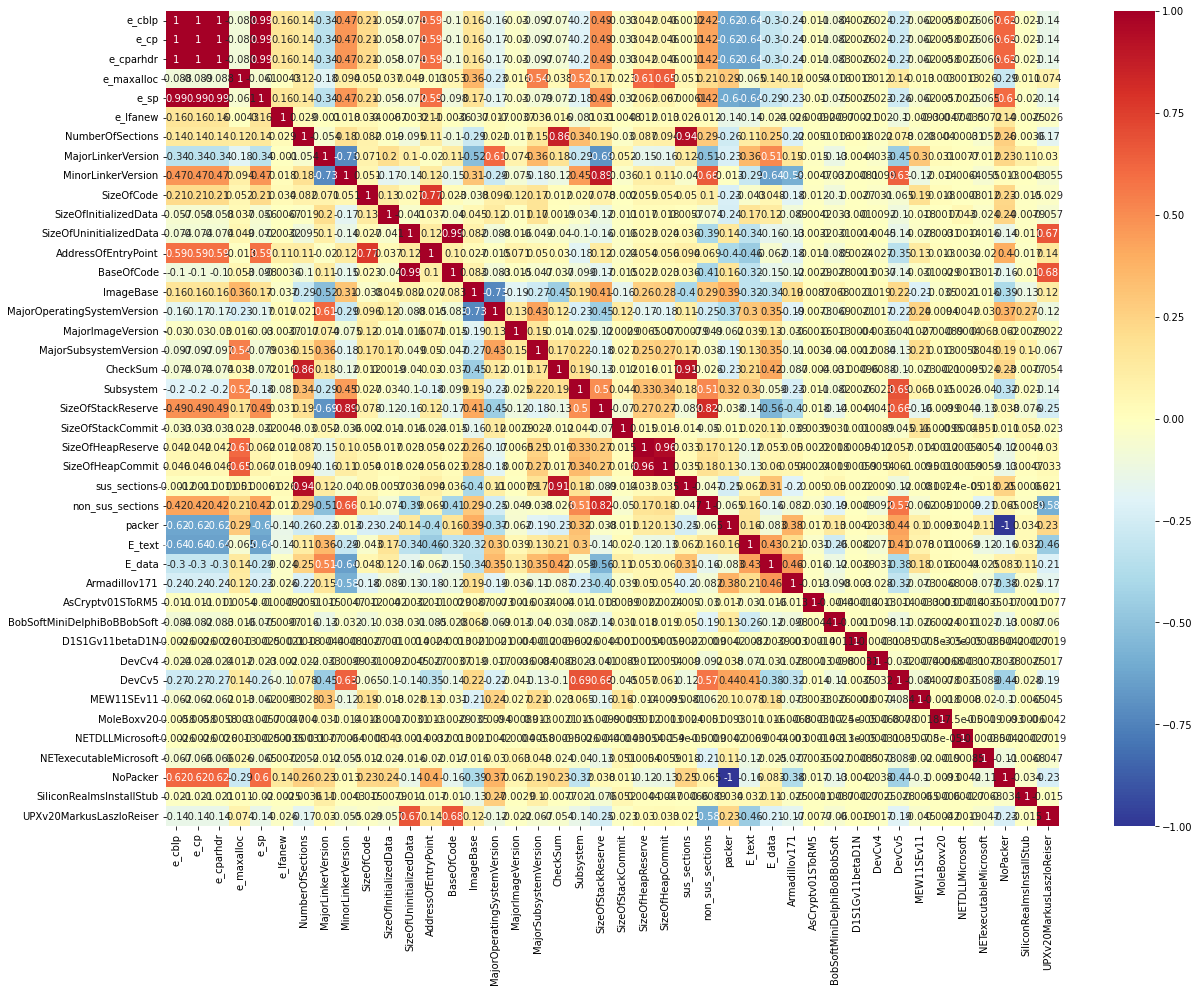

In [196]:
plt.figure(figsize=(20,15))
sns.heatmap(total_X.corr(),annot = True,cmap = 'RdYlBu_r')

In [197]:
lab = LabelEncoder()
lab.fit(total_Y["type"])
total_Y_type = lab.transform(total_Y["type"]) # 문자열 -> 숫자 범주

In [198]:
lab2 = LabelEncoder()
lab2.fit(total_Y["family"])
total_Y_family = lab2.transform(total_Y["family"]) # 문자열 -> 숫자 범주

In [199]:
total_Y = pd.DataFrame(total_Y_type, columns=["type"])
total_Y["family"] = total_Y_family
total_Y.head()

,type,family
0,1,14
1,1,14
2,8,5
3,8,5
4,8,5


In [200]:
total_X["type"] = total_Y["type"]
total_X["family"] = total_Y["family"]

In [201]:
corr_val = abs(total_X.corr())

In [202]:
corr_val["type"].sort_values(ascending=False)[:20]

type                        1.000000
DevCv5                      0.772492
Subsystem                   0.556646
NoPacker                    0.525854
packer                      0.525854
e_cparhdr                   0.463401
e_cp                        0.463371
e_cblp                      0.463152
e_sp                        0.457997
family                      0.400506
MinorLinkerVersion          0.393375
Armadillov171               0.330778
SizeOfStackReserve          0.323976
E_data                      0.302407
E_text                      0.287007
AddressOfEntryPoint         0.279665
MajorLinkerVersion          0.252229
BaseOfCode                  0.250435
SizeOfUninitializedData     0.236895
UPXv20MarkusLaszloReiser    0.232008
Name: type, dtype: float64

In [203]:
corr_val["family"].sort_values(ascending=False)[:20]

family                         1.000000
NoPacker                       0.759772
packer                         0.759772
e_cblp                         0.612060
e_cparhdr                      0.611783
e_cp                           0.611613
e_sp                           0.597454
Armadillov171                  0.420786
type                           0.400506
AddressOfEntryPoint            0.400055
ImageBase                      0.390622
MajorOperatingSystemVersion    0.368362
DevCv5                         0.343762
BaseOfCode                     0.273971
E_text                         0.273782
e_maxalloc                     0.267576
SizeOfUninitializedData        0.255417
BobSoftMiniDelphiBoBBobSoft    0.249552
Subsystem                      0.248736
MinorLinkerVersion             0.227530
Name: family, dtype: float64

In [204]:
total_X.drop(columns=["type","family"],inplace=True)

In [205]:
pca = PCA(n_components=42)
pca.fit(total_X)
pca_X = pca.transform(total_X)

In [206]:
pca_X.shape

(30000, 42)

In [207]:
pca_X

array([[-7.97128709e+07, -7.58151778e+05,  6.23024421e+05, ...,
         3.61877192e-10,  2.13340670e-10,  3.57632035e-09],
       [-7.97128709e+07, -7.58151778e+05,  6.23024421e+05, ...,
         3.61877192e-10,  2.13340670e-10,  3.57632035e-09],
       [-8.01915679e+07, -1.02244462e+06,  5.89769319e+05, ...,
         6.18778986e-05,  2.15591606e-10,  3.59752533e-09],
       ...,
       [-8.03658216e+07, -1.02108367e+06, -4.42169630e+05, ...,
         6.41802235e-06,  2.02041944e-10,  3.63026220e-09],
       [-8.03658216e+07, -1.02108367e+06, -4.42169630e+05, ...,
         6.33073601e-06,  2.02041944e-10,  3.63026220e-09],
       [ 2.92524778e+09,  2.05287454e+05,  1.29737333e+03, ...,
        -2.26146144e-05, -7.48302449e-09, -1.31615239e-07]])

In [208]:
for i in range(1,43):
    test = list(map(lambda x:x[i-1],pca_X))
    total_X["PCA_"+str(i)] = test

In [209]:
total_X.head()

,e_cblp,e_cp,e_cparhdr,e_maxalloc,e_sp,e_lfanew,NumberOfSections,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,...,PCA_33,PCA_34,PCA_35,PCA_36,PCA_37,PCA_38,PCA_39,PCA_40,PCA_41,PCA_42
0,20649,35588,22234,61307,2452,640,8,2,56,245760,...,-3.046358e-07,-3.698650e-07,2.121421e-08,1.030310e-08,-4.242087e-08,3.550419e-09,-4.659223e-10,3.618772e-10,2.133407e-10,3.576320e-09
1,20649,35588,22234,61307,2452,640,8,2,56,245760,...,-3.046358e-07,-3.698650e-07,2.121421e-08,1.030310e-08,-4.242087e-08,3.550419e-09,-4.659223e-10,3.618772e-10,2.133407e-10,3.576320e-09
2,144,3,4,65535,184,128,7,2,56,118784,...,-1.522609e-02,-4.880869e-03,2.479016e-03,-8.483078e-04,-7.319478e-04,4.801467e-05,-1.531443e-05,6.187790e-05,2.155916e-10,3.597525e-09
3,144,3,4,65535,184,128,7,2,56,118784,...,-1.031613e-02,-5.117579e-03,-1.622391e-03,3.673749e-04,-1.352950e-04,-1.167491e-04,-1.893620e-05,-2.874427e-05,2.155911e-10,3.597525e-09
4,144,3,4,65535,184,128,7,2,56,118784,...,-1.031613e-02,-5.117579e-03,-1.622391e-03,3.673749e-04,-1.352950e-04,-1.167491e-04,-1.893620e-05,-2.874427e-05,2.155911e-10,3.597525e-09


### 모델 학습

In [210]:
# split data into train and test sets
seed = 7
test_size = 0.10
X_train, X_test, y_train, y_test = train_test_split(total_X, total_Y, test_size=test_size, random_state=seed)

In [241]:
RF = RandomForestClassifier()
XGB = xgb.XGBClassifier() 
LGBM = LGBMClassifier()

# mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500)

In [225]:
### RandomForest 튜닝닝

# 랜덤포레스트의 하이퍼 파라미터의 범위를 dictionary 형태로 지정해주세요

## Key는 랜덤포레스트의 hyperparameter이름이고, value는 탐색할 범위 입니다.

rf_parameter_bounds = {

                      'max_depth' : (1,3), # 나무의 깊이

                      'n_estimators' : (30,100),

                      }



# 함수를 만들어주겠습니다.

# 함수의 구성은 다음과 같습니다.

# 1. 함수에 들어가는 인자 = 위에서 만든 함수의 key값들

# 2. 함수 속 인자를 통해 받아와 새롭게 하이퍼파라미터 딕셔너리 생성

# 3. 그 딕셔너리를 바탕으로 모델 생성

# 4. train_test_split을 통해 데이터 train-valid 나누기

# 5 .모델 학습

# 6. 모델 성능 측정

# 7. 모델의 점수 반환



def rf_bo(max_depth, n_estimators):

  rf_params = {

              'max_depth' : int(round(max_depth)),

               'n_estimators' : int(round(n_estimators)),      

              }

  rf = RandomForestClassifier(**rf_params)



  X_train, X_valid, y_train, y_valid = train_test_split(total_X,total_Y["type"],test_size = 0.2, )



  rf.fit(X_train,y_train)

  score = accuracy_score(y_valid, rf.predict(X_valid))

  return score



# 이제 Bayesian Optimization을 사용할 준비가 끝났습니다.

# "BO_rf"라는 변수에 Bayesian Optmization을 저장해보세요

BO_rf = BayesianOptimization(f = rf_bo, pbounds = rf_parameter_bounds,random_state = 0)



# Bayesian Optimization을 실행해보세요

BO_rf.maximize(init_points = 5, n_iter = 5)


#-------------------------------------------------------------------------------------------------------------------------------------------------------------



### XGBoost 튜닝
#-------------------------------------------------------------------------------------------------------------------------------------------------------------

# XGBoost의 하이퍼 파라미터의 범위를 dictionary 형태로 지정해주세요

## Key는 XGBoost hyperparameter이름이고, value는 탐색할 범위 입니다.

xgb_parameter_bounds = {

                      'gamma' : (0,10),

                      'max_depth' : (1,3), # 나무의 깊이

                      'subsample' : (0.5,1)

                      }



# 함수를 만들어주겠습니다.

# 함수의 구성은 다음과 같습니다.

# 1. 함수에 들어가는 인자 = 위에서 만든 함수의 key값들

# 2. 함수 속 인자를 통해 받아와 새롭게 하이퍼파라미터 딕셔너리 생성

# 3. 그 딕셔너리를 바탕으로 모델 생성

# 4. train_test_split을 통해 데이터 train-valid 나누기

# 5 .모델 학습

# 6. 모델 성능 측정

# 7. 모델의 점수 반환



def xgb_bo(gamma,max_depth, subsample):

  xgb_params = {

              'gamma' : int(round(gamma)),

              'max_depth' : int(round(max_depth)),

               'subsample' : int(round(subsample)),      

              }

  xgb_clf = xgb.XGBClassifier(**xgb_params)



  X_train, X_valid, y_train, y_valid = train_test_split(total_X,total_Y["type"],test_size = 0.2, )



  xgb_clf.fit(X_train,y_train)

  score = accuracy_score(y_valid, xgb_clf.predict(X_valid))

  return score



# 이제 Bayesian Optimization을 사용할 준비가 끝났습니다.

# "BO_xgb"라는 변수에 Bayesian Optmization을 저장해보세요

BO_xgb = BayesianOptimization(f = xgb_bo, pbounds = xgb_parameter_bounds,random_state = 0)



# Bayesian Optimization을 실행해보세요

BO_xgb.maximize(init_points = 5, n_iter = 5)

#-------------------------------------------------------------------------------------------------------------------------------------------------------------



### Light GBM 
#-------------------------------------------------------------------------------------------------------------------------------------------------------------


# LGBM의 하이퍼 파라미터의 범위를 dictionary 형태로 지정해주세요

## Key는 LGBM hyperparameter이름이고, value는 탐색할 범위 입니다.

lgbm_parameter_bounds = {

                      'n_estimators' : (30,100),

                      'max_depth' : (1,3), # 나무의 깊이

                      'subsample' : (0.5,1)

                      }



# 함수를 만들어주겠습니다.

# 함수의 구성은 다음과 같습니다.

# 1. 함수에 들어가는 인자 = 위에서 만든 함수의 key값들

# 2. 함수 속 인자를 통해 받아와 새롭게 하이퍼파라미터 딕셔너리 생성

# 3. 그 딕셔너리를 바탕으로 모델 생성

# 4. train_test_split을 통해 데이터 train-valid 나누기

# 5 .모델 학습

# 6. 모델 성능 측정

# 7. 모델의 점수 반환



def lgbm_bo(n_estimators,max_depth, subsample):

  lgbm_params = {

              'n_estimators' : int(round(n_estimators)),

              'max_depth' : int(round(max_depth)),

               'subsample' : int(round(subsample)),      

              }

  lgbm = LGBMClassifier(**lgbm_params)



  X_train, X_valid, y_train, y_valid = train_test_split(total_X,total_Y["type"],test_size = 0.2, )



  lgbm.fit(X_train,y_train)

  score = accuracy_score(y_valid, lgbm.predict(X_valid))

  return score



# 이제 Bayesian Optimization을 사용할 준비가 끝났습니다.

# "BO_lgbm"라는 변수에 Bayesian Optmization을 저장해보세요

BO_lgbm = BayesianOptimization(f = lgbm_bo, pbounds = lgbm_parameter_bounds,random_state = 0)



# Bayesian Optimization을 실행해보세요

BO_lgbm.maximize(init_points = 5, n_iter = 5)

|   iter    |  target   | max_depth | n_esti... |
-------------------------------------------------
|  1        |  0.7233   |  2.098    |  80.06    |
|  2        |  0.7458   |  2.206    |  68.14    |
|  3        |  0.7067   |  1.847    |  75.21    |
|  4        |  0.7312   |  1.875    |  92.42    |
|  5        |  0.9758   |  2.927    |  56.84    |
|  6        |  0.9622   |  3.0      |  47.74    |
|  7        |  0.718    |  1.0      |  30.0     |
|  8        |  0.704    |  1.0      |  52.59    |
|  9        |  0.9692   |  2.932    |  47.74    |
|  10       |  0.7125   |  1.811    |  46.71    |
|   iter    |  target   |   gamma   | max_depth | subsample |
-------------------------------------------------------------
|  1        |  0.9993   |  5.488    |  2.43     |  0.8014   |
|  2        |  0.9997   |  5.449    |  1.847    |  0.8229   |
|  3        |  0.9995   |  4.376    |  2.784    |  0.9818   |
|  4        |  0.9993   |  3.834    |  2.583    |  0.7644   |
|  5        |  0.999    |  5

In [232]:
# LGBM = LGBMClassifier(max_depth = 2,n_estimators=92 , subsample = 0.9818)

# XGB = xgb.XGBClassifier(gamma =  5, max_depth = 2, subsample = 0.8229)

# RF = RandomForestClassifier(max_depth = 3, n_estimators = 57)

In [242]:
# fit model no training data
base_lr = VotingClassifier(estimators=[('rf',RF),('xgb',XGB),('lgbm',LGBM)],voting = 'soft')
chain = ClassifierChain(base_lr, order=[0,1], random_state=0)

In [243]:
chain.fit(X_train, y_train)

ClassifierChain(base_estimator=VotingClassifier(estimators=[('rf',
                                                             RandomForestClassifier()),
                                                            ('xgb',
                                                             XGBClassifier()),
                                                            ('lgbm',
                                                             LGBMClassifier())],
                                                voting='soft'),
                order=[0, 1], random_state=0)

In [244]:
preds = chain.predict(X_test)
preds

array([[ 8.,  5.],
       [ 6.,  6.],
       [ 5., 16.],
       ...,
       [ 0.,  9.],
       [ 2.,  4.],
       [ 8.,  5.]])

In [245]:
preds[0]

array([8., 5.])

In [249]:
test1 = list(map(lambda x:x[0],preds))
test2 = list(map(lambda x:x[1],preds))

In [247]:
# evaluate predictions
mean_squared_error(np.array(y_test), preds)

0.22266666666666668

In [250]:
print(classification_report(np.array(y_test["type"]),test1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       180
           1       1.00      1.00      1.00       581
           2       1.00      1.00      1.00       613
           3       1.00      1.00      1.00       206
           4       1.00      1.00      1.00       142
           5       1.00      1.00      1.00       169
           6       1.00      1.00      1.00        88
           7       1.00      1.00      1.00        81
           8       1.00      1.00      1.00       940

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000



In [251]:
print(classification_report(np.array(y_test["family"]),test2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        41
           1       1.00      1.00      1.00        99
           2       1.00      1.00      1.00        98
           3       1.00      1.00      1.00        52
           4       1.00      1.00      1.00       613
           5       1.00      1.00      1.00       800
           6       1.00      1.00      1.00        88
           7       1.00      1.00      1.00        60
           8       0.70      0.73      0.72        52
           9       0.98      1.00      0.99        62
          10       1.00      0.98      0.99        58
          11       1.00      1.00      1.00        81
          12       0.82      0.65      0.73        55
          13       1.00      1.00      1.00       142
          14       1.00      1.00      1.00       483
          15       0.78      0.85      0.81        99
          16       1.00      1.00      1.00       117

    accuracy              

In [218]:
result = pd.DataFrame(preds,columns=["type","family"])

In [219]:
result["filname"] = malware_df["filename"]

In [220]:
result

,type,family,filname
0,8.0,5.0,4725522152
1,6.0,6.0,4725011706
2,5.0,16.0,4808904332
3,1.0,14.0,4587123448
4,8.0,5.0,4684923595
...,...,...,...
2995,8.0,5.0,4716149867
2996,2.0,4.0,4693245814
2997,0.0,9.0,4482924450
2998,2.0,4.0,4756443644


In [213]:
chain.fit(total_X, total_Y)

ClassifierChain(base_estimator=VotingClassifier(estimators=[('rf',
                                                             RandomForestClassifier()),
                                                            ('xgb',
                                                             XGBClassifier()),
                                                            ('lgbm',
                                                             LGBMClassifier())],
                                                voting='soft'),
                order=[0, 1], random_state=0)

### 추론

In [252]:
pre_df = pd.read_csv("./malware_feature_pre.csv")

In [253]:
pre_df.head()

,filename,MD5,e_cblp,e_cp,e_cparhdr,e_maxalloc,e_sp,e_lfanew,NumberOfSections,CreationYear,...,SizeOfHeapCommit,LoaderFlags,sus_sections,non_sus_sections,packer,packer_type,E_text,E_data,fileinfo,class
0,4725012458.txt,38bfd287cc5148bc57291bc7828321f4,20649,35588,22234,61307,2452,640,8,0,...,4096,1,2,6,0,NoPacker,0.000000,0.000000,0,4725012458
1,4353956106.txt,ad746cd079b83d30c9d2b02dc603ef6b,80,2,4,65535,184,256,4,0,...,4096,1,3,1,1,BobSoftMiniDelphiBoBBobSoft,0.000000,0.000000,0,4353956106
2,4725571335.txt,60210e951a07febfe64efb5a7c2815ce,20649,35588,22234,61307,2452,640,8,0,...,4096,1,2,6,0,NoPacker,0.000000,0.000000,0,4725571335
3,4736804701.txt,40df721f2b961a79e7e0e4b165b985aa,144,3,4,65535,184,128,7,0,...,4096,1,1,6,1,DevCv5,6.235496,0.070560,0,4736804701
4,4485784675.txt,bc5a42a6594e23206bc6ea1a11a7d3bf,144,3,4,65535,184,248,5,0,...,4096,1,2,3,0,NoPacker,6.485278,6.141911,0,4485784675


In [254]:
pre_df = pre_df.drop(columns = ["fileinfo","LoaderFlags",'OH_DLLchar0','OH_DLLchar1','OH_DLLchar2','OH_DLLchar3',
                              'OH_DLLchar4','OH_DLLchar5','OH_DLLchar6','OH_DLLchar7','OH_DLLchar8','OH_DLLchar9','OH_DLLchar10',
                              'SizeOfImage','SizeOfHeaders','SectionAlignment','FileAlignment',
                              'FH_char5','FH_char6','FH_char7','FH_char8','FH_char9','FH_char10','FH_char11','FH_char12','FH_char13','FH_char14',
                              'CreationYear','FH_char0','FH_char1','FH_char2','FH_char3','FH_char4'])

In [255]:
pre_df.rename(columns = {'filename' : 'origin_file'}, inplace = True)
pre_df.rename(columns = {'class' : 'filename'}, inplace = True)

In [256]:
pre_df.head()

,origin_file,MD5,e_cblp,e_cp,e_cparhdr,e_maxalloc,e_sp,e_lfanew,NumberOfSections,MajorLinkerVersion,...,SizeOfStackCommit,SizeOfHeapReserve,SizeOfHeapCommit,sus_sections,non_sus_sections,packer,packer_type,E_text,E_data,filename
0,4725012458.txt,38bfd287cc5148bc57291bc7828321f4,20649,35588,22234,61307,2452,640,8,2,...,4096,1048576,4096,2,6,0,NoPacker,0.000000,0.000000,4725012458
1,4353956106.txt,ad746cd079b83d30c9d2b02dc603ef6b,80,2,4,65535,184,256,4,2,...,16384,1048576,4096,3,1,1,BobSoftMiniDelphiBoBBobSoft,0.000000,0.000000,4353956106
2,4725571335.txt,60210e951a07febfe64efb5a7c2815ce,20649,35588,22234,61307,2452,640,8,2,...,4096,1048576,4096,2,6,0,NoPacker,0.000000,0.000000,4725571335
3,4736804701.txt,40df721f2b961a79e7e0e4b165b985aa,144,3,4,65535,184,128,7,2,...,4096,1048576,4096,1,6,1,DevCv5,6.235496,0.070560,4736804701
4,4485784675.txt,bc5a42a6594e23206bc6ea1a11a7d3bf,144,3,4,65535,184,248,5,10,...,8192,1048576,4096,2,3,0,NoPacker,6.485278,6.141911,4485784675


In [257]:
pre_df.drop(columns=["origin_file","MD5"],inplace=True)

In [258]:
pre_df_enc = hot_encoding(pre_df.drop(columns=["filename"]))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  if sys.path[0] == '':


In [259]:
total_X_pre = pre_df_enc[0].iloc[:,:]

In [260]:
pca_X_pre = pca.transform(total_X_pre)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- ASPackv212AlexeySolodovnikov
Feature names seen at fit time, yet now missing:
- D1S1Gv11betaD1N

  warnings.warn(message, FutureWarning)


In [261]:
for i in range(1,43):
    test = list(map(lambda x:x[i-1],pca_X_pre))
    total_X_pre["PCA_"+str(i)] = test

In [262]:
total_X_pre.head()

,e_cblp,e_cp,e_cparhdr,e_maxalloc,e_sp,e_lfanew,NumberOfSections,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,...,PCA_33,PCA_34,PCA_35,PCA_36,PCA_37,PCA_38,PCA_39,PCA_40,PCA_41,PCA_42
0,20649,35588,22234,61307,2452,640,8,2,56,245760,...,-3.046358e-07,-3.698650e-07,2.121421e-08,1.030310e-08,-4.242087e-08,3.550419e-09,-4.659223e-10,3.618772e-10,2.133407e-10,3.576320e-09
1,80,2,4,65535,184,256,4,2,25,12288,...,-2.289965e-01,-7.438455e-02,1.761639e-01,-9.149486e-03,7.316201e-02,1.277320e-01,7.671239e-01,-7.036870e-01,2.028216e-10,3.629092e-09
2,20649,35588,22234,61307,2452,640,8,2,56,245760,...,-3.046358e-07,-3.698650e-07,2.121421e-08,1.030310e-08,-4.242087e-08,3.550419e-09,-4.659223e-10,3.618772e-10,2.133407e-10,3.576320e-09
3,144,3,4,65535,184,128,7,2,56,118784,...,-1.033421e-02,-5.130834e-03,-1.639382e-03,3.697922e-04,-1.327525e-04,-1.175332e-04,-1.876259e-05,-2.899238e-05,2.155911e-10,3.597525e-09
4,144,3,4,65535,184,248,5,10,0,17920,...,-3.011552e-01,-1.089295e-01,-2.153391e-02,-5.256093e-04,-7.131756e-03,-6.311973e-03,-2.184169e-04,4.930870e-04,1.952858e-10,3.639744e-09


In [263]:
preds_pre = chain.predict(total_X_pre)
preds_pre

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- ASPackv212AlexeySolodovnikov
Feature names seen at fit time, yet now missing:
- D1S1Gv11betaD1N

  warnings.warn(message, FutureWarning)


array([[ 1., 14.],
       [ 1.,  2.],
       [ 1., 14.],
       ...,
       [ 0.,  9.],
       [ 3., 12.],
       [ 8.,  5.]])

In [264]:
result = pd.DataFrame(preds_pre,columns=["type","family"])

In [265]:
result["filname"] = pre_df["filename"]

In [266]:
pre_type = lab.inverse_transform(result["type"].astype(int))
pre_type

array(['EQbM', 'EQbM', 'EQbM', ..., 'BghB', 'PRoU', 'wbxA'], dtype=object)

In [267]:
pre_family = lab2.inverse_transform(result["family"].astype(int))
pre_family

array(['tnwODn', 'KuazmQ', 'tnwODn', ..., 'gaklnp', 'ofoHbd', 'RxOaTd'],
      dtype=object)

In [268]:
sample_submission = pd.read_csv('./cc224e05-68c8-429d-b7d0-3b526de9cdd9-track_a_pre_answer.csv')

In [269]:
sample_submission["type"] = pre_type
sample_submission["family"] = pre_family
sample_submission["filename"] = result["filname"]

In [270]:
sample_submission.to_csv("./cc224e05-68c8-429d-b7d0-3b526de9cdd9-track_a_pre_answer_pre.csv", index = False)